# Strava Activity Analysis

**DeepTech Entrepreneurship (Vilnius University Business School)**  
**Student:** Kipras Daugirdas
**Date:** 2025-05-05 

This notebook explores and visualizes personal Strava activity data over time. We cover temporal patterns, activity trends, and introduce a simple linear model to analyze distance evolution.  

In [11]:
from dateutil import parser

# Reload and parse entire dataset
df_raw = pd.read_csv('../Data/strava_activities.csv')

# Parse start_date using dateutil (handles inconsistent formats)
df_raw['start_date'] = df_raw['start_date'].apply(lambda x: parser.parse(x) if pd.notnull(x) else pd.NaT)

# Confirm parsing worked
print("Parsed dates:", df_raw['start_date'].notna().sum())
print("Total rows:", len(df_raw))

# Use cleaned version
df = df_raw.copy()

# Extract date parts
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['weekday'] = df['start_date'].dt.day_name()


Parsed dates: 1393
Total rows: 1393


In [12]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Work on a clean copy
df = df_raw.copy()

# Extract year, month, weekday
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['weekday'] = df['start_date'].dt.day_name()

# Preview
df[['start_date', 'year', 'month', 'weekday']].head()


,start_date,year,month,weekday
0,2025-05-03 08:30:02+00:00,2025,5,Saturday
1,2025-05-03 07:58:56+00:00,2025,5,Saturday
2,2025-05-01 07:29:27+00:00,2025,5,Thursday
3,2025-04-30 15:15:28+00:00,2025,4,Wednesday
4,2025-04-30 05:48:01+00:00,2025,4,Wednesday


/var/folders/vz/dvb1tg2x4f976pbkpkgyztnh0000gp/T/ipykernel_14123/1379849129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weekday', order=weekday_order, palette='viridis')


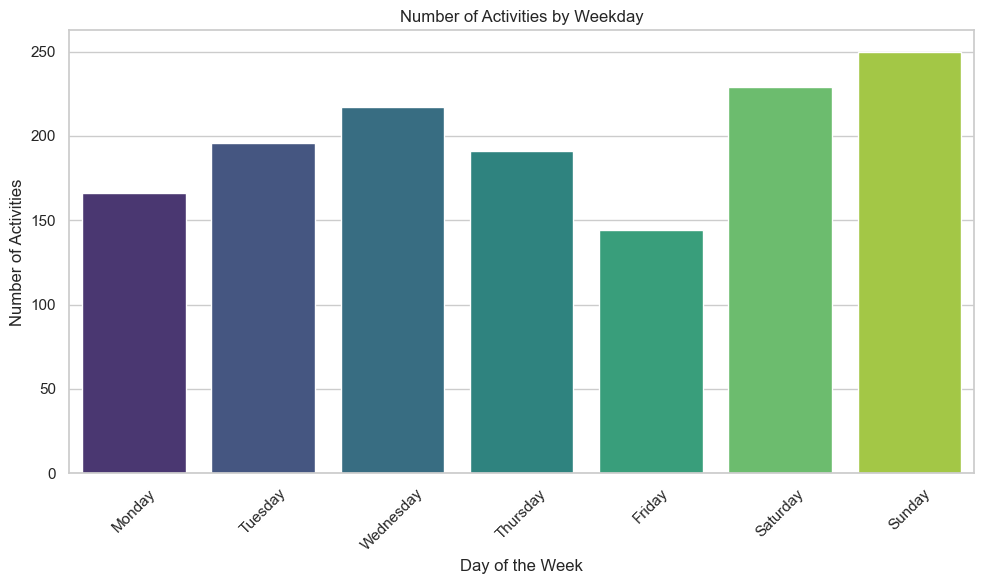

In [14]:
sns.set(style='whitegrid')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weekday', order=weekday_order, palette='viridis')
plt.title('Number of Activities by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


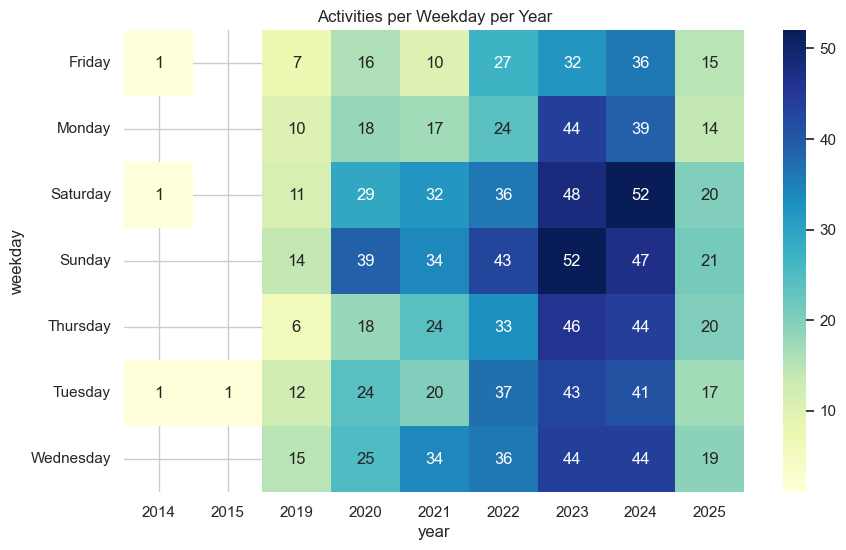

In [15]:
pivot = df.pivot_table(index='weekday', columns='year', values='start_date', aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Activities per Weekday per Year")
plt.show()


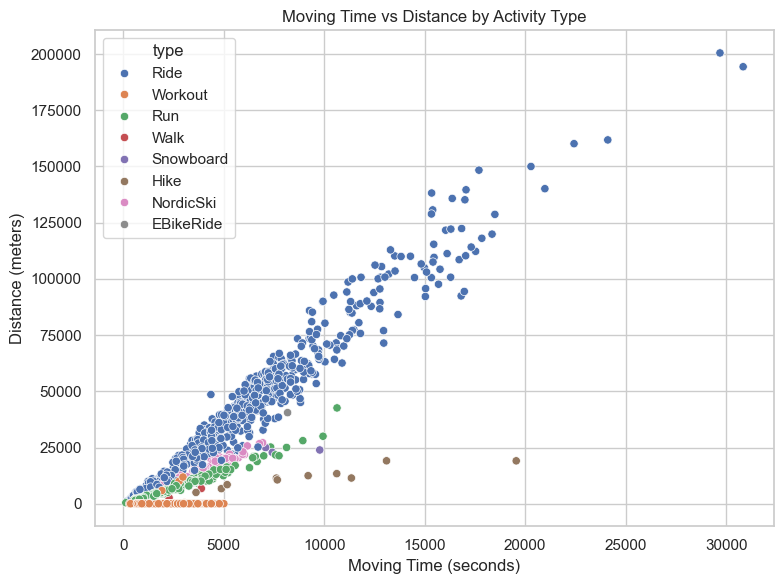

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='moving_time', y='distance', hue='type')
plt.title('Moving Time vs Distance by Activity Type')
plt.xlabel('Moving Time (seconds)')
plt.ylabel('Distance (meters)')
plt.tight_layout()
plt.show()


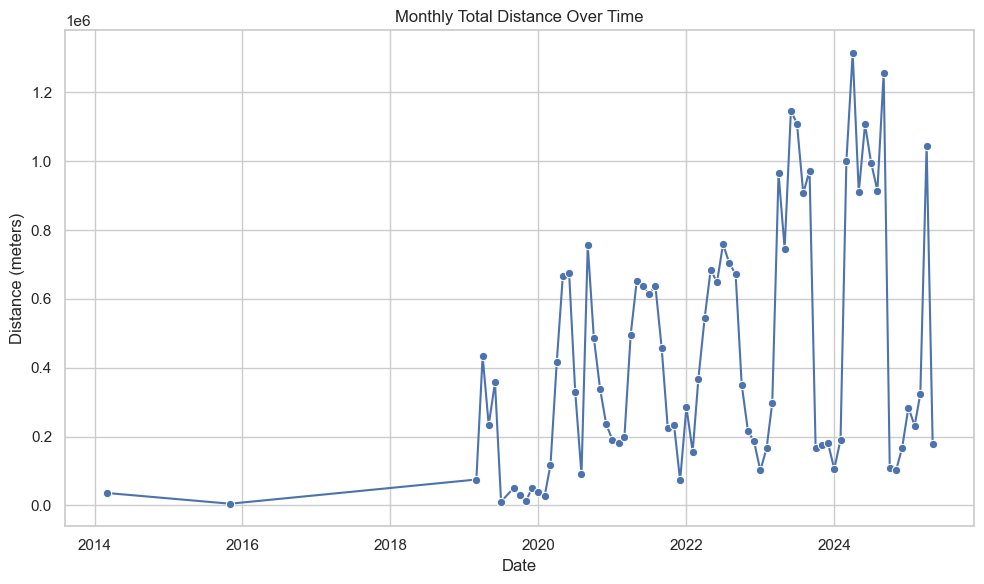

In [17]:
monthly = df.groupby(['year', 'month'])['distance'].sum().reset_index()
monthly['date'] = pd.to_datetime(monthly[['year', 'month']].assign(day=1))

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly, x='date', y='distance', marker='o')
plt.title("Monthly Total Distance Over Time")
plt.ylabel("Distance (meters)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


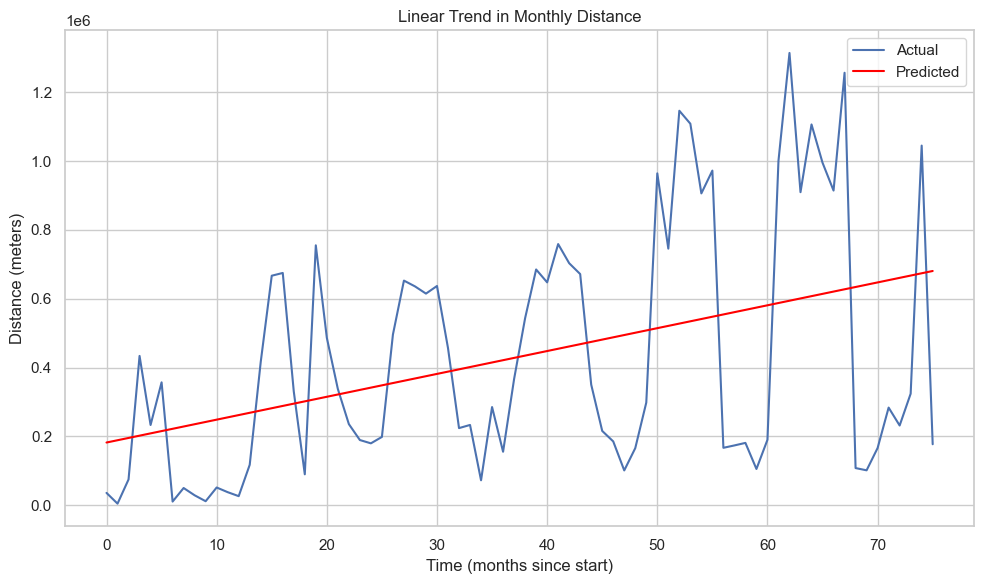

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly = monthly.sort_values('date')
monthly['month_num'] = np.arange(len(monthly))

X = monthly[['month_num']]
y = monthly['distance']

model = LinearRegression()
model.fit(X, y)

monthly['predicted'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(monthly['month_num'], monthly['distance'], label='Actual')
plt.plot(monthly['month_num'], monthly['predicted'], label='Predicted', color='red')
plt.title("Linear Trend in Monthly Distance")
plt.xlabel("Time (months since start)")
plt.ylabel("Distance (meters)")
plt.legend()
plt.tight_layout()
plt.show()
